In [92]:
import pandas as pd
import numpy as np
from numpy import NaN, nan, NAN
import warnings
warnings.filterwarnings(action='ignore')

In [10]:
df = pd.DataFrame(np.random.randn(5,3),
                 columns=['c1','c2','c3'])

df.iloc[0,0] = NaN
df

,c1,c2,c3
0,NaN,0.800092,1.684098
1,0.407127,-0.750674,-2.094989
2,-0.330519,2.057525,-0.165001
3,-0.394050,0.454962,-0.718833
4,-0.197112,0.320105,-0.520870


In [23]:
df.ix[1,['c1','c3']]=NaN

df.ix[2,['c2']] = None
df.ix[3,['c2']] = None
df.ix[4,['c3']] = None
df

df.fillna(0)
df.fillna(method='ffill')
df

,c1,c2,c3
0,NaN,0.800092,1.684098
1,NaN,-0.750674,NaN
2,-0.330519,NaN,-0.165001
3,-0.394050,NaN,-0.718833
4,-0.197112,0.320105,NaN


In [25]:
df.fillna(df.mean())

# df 조건

df.where(pd.notnull(df),df.mean(),axis='columns')

,c1,c2,c3
0,-0.307227,0.800092,1.684098
1,-0.307227,-0.750674,0.266755
2,-0.330519,0.123174,-0.165001
3,-0.394050,0.123174,-0.718833
4,-0.197112,0.320105,0.266755


# np.where 함수
np.where(조건, 참일때, 거짓일때)

In [44]:
arr = np.array([1,2,3,10,20,30,0.1,0.2])
min(arr)
np.argmin(arr)  # 배열의 최소값의 위치를 반환
np.argmax(arr)  # 배열의 최대값의 위치를 반환

# where함수는 조건문 사용 
np.where(arr<1)  # [6,7] 1보다 작은 값들의 인덱스 출력
np.where(arr>=10,0,arr)  # 조건이 참이면 0, 거짓이면 arr 그대로
np.where(arr>=10,arr*0.1,arr)  

df.fillna(df.mean()['c1'])

,c1,c2,c3
0,-0.307227,0.800092,1.684098
1,-0.307227,-0.750674,-0.307227
2,-0.330519,-0.307227,-0.165001
3,-0.394050,-0.307227,-0.718833
4,-0.197112,0.320105,-0.307227


In [47]:
df.fillna(df.mean()['c1':'c2'])  # 에러가 날 것 같지만 그냥 c3열만 대체 X

,c1,c2,c3
0,-0.307227,0.800092,1.684098
1,-0.307227,-0.750674,NaN
2,-0.330519,0.123174,-0.165001
3,-0.394050,0.123174,-0.718833
4,-0.197112,0.320105,NaN


In [63]:
df = pd.DataFrame({
    'c1':[1,2,3,4,5],
    'c2':[9,7,8,9,10]
})
df.ix[[1,3],'c2']=NaN
df

,c1,c2
0,1,9.0
1,2,NaN
2,3,8.0
3,4,NaN
4,5,10.0


In [ ]:
# c2p열에는 c2열 값이 notnull이면 c2열 값을
#          c2열 값이 null이면 c1열 값을 채우고자함
df['c2p']=np.where(pd.notnull(df['c2'])==True, df['c2'],df['c1'])
df

In [69]:
for i in range(df.shape[0]):
    if pd.notnull(df.ix[i,'c2'])==True:  # 
        df.ix[i,'c2p']=df.ix[i,'c2']
    else:
        df.ix[i,'c2p']=df.ix[i,'c1']
df

,c1,c2,c2p
0,1,9.0,9.0
1,2,NaN,2.0
2,3,8.0,8.0
3,4,NaN,4.0
4,5,10.0,10.0


# dropna 메서드 
: 열(axis=1) / 행 (axis=0) 제거

In [74]:
df = pd.DataFrame({
    'c1':[1,2,3,4,5],
    'c2':[9,7,8,9,10]
})
df.ix[[1,3],'c2']=NaN

,c1,c2
0,1,9.0
1,2,NaN
2,3,8.0
3,4,NaN
4,5,10.0


In [80]:
df.dropna(axis=0)  # 결측값이 있는 행 전체 제거
df.dropna(axis=1)  # 결측값이 있는 열 전체 제거
df[['c1','c2']].dropna()  # default) axis=0

,c1,c2
0,1,9.0
2,3,8.0
4,5,10.0


# 결측값 보간(interpolate)
1) 시계열 데이터에 대해 선형적으로 비례하는 값 
0
2
4
na => 6
8

2) 이미지 보간 : 그라데이션과 비슷

In [81]:
from datetime import datetime
# datetime 모듈에 있응 datetime함수를 import

In [103]:
dateStr = ['1/13/2020','1/16/2020','1/17/2020','1/20/2020']
dateStr
dates = pd.to_datetime(dateStr)
dates

DatetimeIndex(['2020-01-13', '2020-01-16', '2020-01-17', '2020-01-20'], dtype='datetime64[ns]', freq=None)

In [104]:
ts = pd.Series([1,NaN,NaN,10], index=dates)
ts

2020-01-13     1.0
2020-01-16     NaN
2020-01-17     NaN
2020-01-20    10.0
dtype: float64

In [98]:
help(df.interpolate)

Help on method interpolate in module pandas.core.generic:

interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='forward', limit_area=None, downcast=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Interpolate values according to different methods.
    
    Please note that only ``method='linear'`` is supported for
    DataFrame/Series with a MultiIndex.
    
    Parameters
    ----------
    method : str, default 'linear'
        Interpolation technique to use. One of:
    
        * 'linear': Ignore the index and treat the values as equally
          spaced. This is the only method supported on MultiIndexes.
        * 'time': Works on daily and higher resolution data to interpolate
          given length of interval.
        * 'index', 'values': use the actual numerical values of the index.
        * 'pad': Fill in NaNs using existing values.
        * 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline',
          'barycentric', '

In [105]:
# 선형적으로 비례하게 결측값 보간
tslr = ts.interpolate()  
# dafault
# method = values
tslr

2020-01-13     1.0
2020-01-16     4.0
2020-01-17     7.0
2020-01-20    10.0
dtype: float64

In [107]:
# method = 'time'
# 인덱스의 날짜를 기준으로 간격을 나눠 보간
# limit = n 
# 결측값을 n개 만큼만 보간한다. 
tsTime = ts.interpolate(method='time', limit=1)  
tsTime

2020-01-13     1.000000
2020-01-16     4.857143
2020-01-17          NaN
2020-01-20    10.000000
dtype: float64

# na를 대체 : fillna, replace
fillna  : na값만을 대체

replace : 다른 모든 값들에 대해 대체 가능 

In [122]:
# Series에 대해 replace
s = pd.Series([1,2,3,4,nan])
s

s.replace(3,9)   # 3 -> 9
s.replace(nan,5) # nan -> 5

# 리스트 형태로 replace
s = pd.Series([1,2,3,1,nan])
s.replace([1,2,3],[6,7,8])
s.replace([1,2,3,nan],[10,20,30,99])

# 딕셔너리 형태로 replace
# {원래값:바꿀값, ..}
s.replace({1:100, 2:200})

0    100.0
1    200.0
2      3.0
3    100.0
4      NaN
dtype: float64

In [125]:
# DataFrame에 대해 replace
df = pd.DataFrame({
    'c1':['aaa','b','c','d'],
    'c2':[1,2,3,4],
    'c3':[5,6,7,nan]
})
df

,c1,c2,c3
0,aaa,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [130]:
df.replace('aaa','bbb')
df.replace({'c1':'aaa'},{'c1':'vvv'})
df.replace({'c3':nan},{'c3':99})
df.replace({'c3':nan},88)

,c1,c2,c3
0,aaa,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,88.0


# 병합
중복 데이터 발생
a01 홍길동 -> 임꺽정 ( 여기저기에 흩어져있다면.. ?)

중복데이터 여부 : duplicated()
중복데이터 처리 : 한 개만 남겨놓고 나머지는 제거 (drop_duplicates())

In [131]:
help(df.drop_duplicates)

Help on method drop_duplicates in module pandas.core.frame:

drop_duplicates(subset=None, keep='first', inplace=False) method of pandas.core.frame.DataFrame instance
    Return DataFrame with duplicate rows removed, optionally only
    considering certain columns. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns
    keep : {'first', 'last', False}, default 'first'
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : boolean, default False
        Whether to drop duplicates in place or to return a copy
    
    Returns
    -------
    DataFrame



In [159]:
df = pd.DataFrame({
    'k1':['b','b','b','c','c'],
    'k2':['x','y','y','x','z'],
    'col':[10,20,30,40,50],
})
df

,k1,k2,col
0,b,x,10
1,b,y,20
2,b,y,30
3,c,x,40
4,c,z,50


In [160]:
# 위에서 아래로 내려가며 두번 같은 값이 나오면 True
df.duplicated(['k1']) 
df.duplicated(['k1'],keep='first')  # default keep='first'
df.duplicated(['k1'],keep='last') # 중복된 값들 중 마지막 값만 False
df.duplicated(['k1'],keep=False)  # 중복된 값들은 모두 True

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [161]:
# 중복값 제거(한개만 살리고 나머지 중복값 제거)
df.drop_duplicates(['k1'])  # 중복값 중 첫번째 값만 생존 
# default keep='first'
df.drop_duplicates(['k1'],keep='first')
df.drop_duplicates(['k1'],keep='last')
df.drop_duplicates(['k1'],keep=False)


,k1,k2,col


# unique(), value_counts()
unique() : 유일한 값을 찾을 때 사용하는 함수

value_counts() : 유일한 값 개수 세기

In [165]:
# 유일 값 출력
df = pd.DataFrame({
    'a':['a1','a1','a2','a2','a3'],
    'b':['b1','b1','b2','b2',nan],
    'c':[1,1,3,4,4],
})
df['a'].unique()
df['b'].unique()
df['c'].unique()

array([1, 3, 4], dtype=int64)

In [193]:
# help(pd.Series.value_counts)
# value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)

# normalize=False : 개수 (default)
# normalize=True : 상대비율

# sort = True : 개수 기준 정렬 (default)
# sort = False : 개수 기준 정렬

# ascending = False : 내림차순 정렬 (default)

# dropna=False : NaN값은 제외 (default)
# dropna=True : NaN도 카운팅

# bins = [0,2,5] : 구간별 개수 카운팅

In [175]:
# 유일값 개수 세기
# normalize=False(default): 개수
# normalize = True : 상대비율

df['a'].value_counts(normalize=False)
df['a'].value_counts(normalize=True)
df['a'].value_counts(normalize=False,
                    sort=True,
                    ascending=True)

a3    1
a2    2
a1    2
Name: a, dtype: int64

In [179]:
# 유일한 값의 개수를 기준으로 내림차순 정렬
df['c'].value_counts(sort=True, ascending=True)

# 정렬 기준 X
df['c'].value_counts(sort=False)

1    2
3    1
4    2
Name: c, dtype: int64

In [192]:
df['b'].value_counts(dropna=False)
 
df['c']  # 1 1 3 4 4

# 구간별 데이터 개수 세기
df['c'].value_counts(sort=False, bins=[0,1,2,3,4,5])
df['c'].value_counts(sort=False, bins=[0,3,5])
# ( ):개구간(포함X) / [ ] : 폐구간(포함O)

# pandas cut함수 활용 동일 결과 도출
res = pd.cut(df['c'],bins=[0,3,5])
pd.value_counts(res)

(0, 3]    3
(3, 5]    2
Name: c, dtype: int64

# 데이터 표준화
변수들 간 척도가 다른 경우 데이터 표준화
표준화 : (각 데이터 - 평균) / 표준편차
(모집단이 정규분포를 따르는 경우에 평균0, 표준편차1인 표준정규분포로 표준화하는 방법)
1) numpy
2) scipy.stats:zscore
3) sklearn.preprocessing함수

<모수적방법>
중심극한정리 : 무작위로 복원추출하면, 연속형 자료의 경우 평균의 분포는 정규분포를 띈다
            (30개 이상의 표본의 경우에 정규분포를 따른다.)
<비모수적방법>
자료를 크기로 나열 -> 순위 매김 -> 차이를 비교
(10개 미만의 표본의 경우에는 모수적 방법을 사용 x)

In [194]:
# numpy
from numpy import *

In [261]:
data = random.randint(30,size=(5,6))
data

array([[10,  9, 29, 14, 16, 22],
       [ 2, 11, 25,  9,  5,  1],
       [25, 26, 20, 23, 29,  4],
       [ 5,  3,  6,  2,  3, 13],
       [17,  3,  4, 24,  7, 13]])

In [278]:
# 표준화 = (각 데이터 - 평균(각 열)) / std(각 열)
std_data=(data - np.mean(data, axis=0)) / np.std(data, axis=0)
std_data
np.mean(std_data, axis=0)
np.std(std_data, axis=0)
print(std_data)

[[-0.21613145 -0.16610265  1.21178767 -0.04786388  0.41702883  1.53106363]
 [-1.17671566  0.07118685  0.81448024 -0.64616234 -0.72980045 -1.28931674]
 [ 1.58496395  1.85085809  0.31784595  1.02907336  1.77237252 -0.88640526]
 [-0.81649658 -0.87797115 -1.07273007 -1.48378019 -0.93831486  0.32232919]
 [ 0.62437974 -0.87797115 -1.27138379  1.14873305 -0.52128604  0.32232919]]


In [277]:
# scipy
import scipy.stats as ss
# 통계관련한 함수
data_ss = ss.zscore(data)
data_ss

array([[-0.21613145, -0.16610265,  1.21178767, -0.04786388,  0.41702883,
         1.53106363],
       [-1.17671566,  0.07118685,  0.81448024, -0.64616234, -0.72980045,
        -1.28931674],
       [ 1.58496395,  1.85085809,  0.31784595,  1.02907336,  1.77237252,
        -0.88640526],
       [-0.81649658, -0.87797115, -1.07273007, -1.48378019, -0.93831486,
         0.32232919],
       [ 0.62437974, -0.87797115, -1.27138379,  1.14873305, -0.52128604,
         0.32232919]])

In [276]:
# sklearn
from sklearn.preprocessing import *
ss_data = StandardScaler().fit_transform(data)
ss_data

array([[-0.21613145, -0.16610265,  1.21178767, -0.04786388,  0.41702883,
         1.53106363],
       [-1.17671566,  0.07118685,  0.81448024, -0.64616234, -0.72980045,
        -1.28931674],
       [ 1.58496395,  1.85085809,  0.31784595,  1.02907336,  1.77237252,
        -0.88640526],
       [-0.81649658, -0.87797115, -1.07273007, -1.48378019, -0.93831486,
         0.32232919],
       [ 0.62437974, -0.87797115, -1.27138379,  1.14873305, -0.52128604,
         0.32232919]])

In [ ]:
# 예외적인 값(이상치, 특이값, outlier)이 들어있는 경우
# 표준정규분포로의 표준화 : 이상치, 특이값이 없는 경우
# Z = (x - mean) / std

# 이상치가 데이터에 포함되어 있는 경우에는 표준화를 어떻게 ?
# 1) 이상치, 특이값을 찾아서 제거 (IQR의 1.5배를 넘어가는 수)
# 2) 중앙값(median), IQR을 이용하여 스케일링


In [280]:
# RobustScaler() 데이터의 이상치가 있는 데이터 표준화
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

(array([ 1.,  1.,  4.,  6., 13., 16., 20., 12., 21.,  6.]),
 array([-0.47775996,  0.38087751,  1.23951499,  2.09815246,  2.95678993,
         3.81542741,  4.67406488,  5.53270235,  6.39133983,  7.2499773 ,
         8.10861477]),
 <a list of 10 Patch objects>)

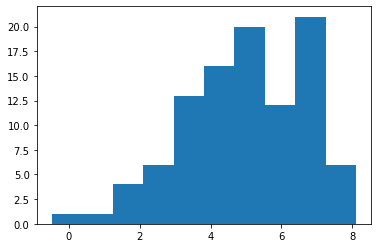

In [341]:
# 평균 , 표준편차
mu, sigma = 5, 2

x = mu + sigma * np.random.randn(100)
plt.hist(x)

In [345]:
print(np.mean(x))
print(np.std(x))

4.989694284164421
1.725460841375069


In [346]:
# 이상치 생성
x[98:100]=100
x

array([  4.71165894,   7.74904031,   6.58147133,   3.03849979,
         3.55543629,   4.16480602,   5.36852704,   4.07434815,
         5.73795642,   5.16623942,   1.494503  ,   6.5236959 ,
         7.70661296,   3.08707296,   5.51348787,   4.38819454,
         6.39191755,   3.66860388,   3.98043546,   1.64541004,
         4.97370846,   7.91350632,   7.00585494,   4.11677687,
         7.83544654,   3.92662436,   4.62451168,   4.21944409,
         7.22207608,   4.83557722,   5.43741593,   6.46980309,
         1.82398368,   3.49852863,   5.22317774,   5.60555639,
         6.25354498,   3.97147156,   4.38959539,   5.40334283,
         5.74624578,   3.63793093,  -0.47775996,   4.61990739,
         6.45369741,   3.76738196,   6.5488681 ,   6.8074156 ,
         5.37246817,   5.20166029,   8.10861477,   5.31856667,
         4.06864855,   8.01390109,   6.67588746,   5.17521923,
         4.93245248,   2.79797429,   7.11933565,   6.7342174 ,
         5.99888306,   6.60170886,   5.68407397,   3.21

6.88066924128058
13.414024551016656


(array([ 4., 23., 38., 30.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

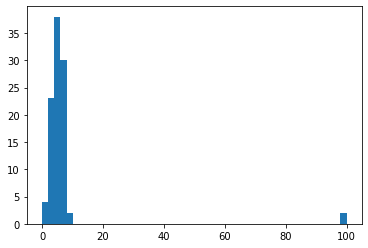

In [351]:
print(np.mean(x))
print(np.std(x))
plt.hist(x, bins=np.arange(0,102,2))

In [365]:
# x = x.reshape(100,1)
x = x.reshape(-1,1)
xs = StandardScaler().fit_transform(x)
print(np.mean(xs))
print(np.std(xs))
plt.hist(xs)

8.881784197001253e-17
1.0


(array([ 0.,  0.,  0.,  0.,  1.,  2.,  9., 21., 27., 26., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

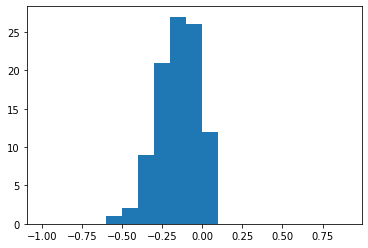

In [373]:
xss=xs[xs<5]
plt.hist(xss,bins=np.arange(-1,1,0.1))


In [382]:
# 이상치 포함 데이터의 중앙값, IQR을 이용 -> 표준화
np.median(x)
print(np.percentile(x,25))
q1=np.percentile(x,25)  # 1사분위수
print(np.percentile(x,75))
q3=np.percentile(x,75)  # 3사분위수
IQR = q3 - q1
print(IQR)

3.886813763439275
6.5299889530876545


2.6431751896483795

(array([1., 2., 3., 6., 3., 6., 6., 4., 4., 5., 9., 4., 2., 5., 4., 8., 5.,
        5., 0.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

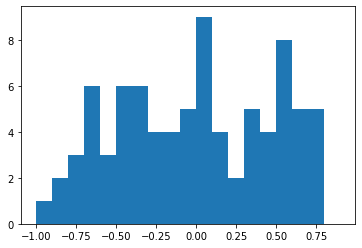

In [392]:
x_rs=RobustScaler().fit_transform(x)
x_rs
np.median(x_rs)  # 0
np.mean(x_rs)    # 0.65
np.std(x_rs)     # 5.0
# plt.hist(x_rs)

x_rs_z = x_rs[x_rs<10]
plt.hist(x_rs_z, bins=np.arange(-1,1,0.1))
# 설명변수가 더 넓게 분포되기 때문에 Y를 설명하기에 더 용이하다!

1. NumPy를 사용하여 다음과 같은 행렬을 만든다.

10 20 30 40
50 60 70 80

In [399]:
# 1
res = np.arange(10,90,10).reshape(2,4)

array([[10, 20, 30, 40],
       [50, 60, 70, 80]])

2. 다음 행렬과 같은 행렬이 있다.

m = np.array([[ 0,  1,  2,  3,  4],
              [ 5,  6,  7,  8,  9],
              [10, 11, 12, 13, 14]])
이 행렬에서 값 7 을 인덱싱한다.
이 행렬에서 값 14 을 인덱싱한다.
이 행렬에서 배열 [6, 7] 을 슬라이싱한다.
이 행렬에서 배열 [7, 12] 을 슬라이싱한다.
이 행렬에서 배열 [[3, 4], [8, 9]] 을 슬라이싱한다.

In [439]:
# 2
m = np.array([[ 0,  1,  2,  3,  4],
              [ 5,  6,  7,  8,  9],
              [10, 11, 12, 13, 14]])
# 2-1
m[1][2]  # 7
m[1,2]

# 2-2
m[2][4]  # 14
m[2,4]

# 2-3
m[1][1:3]    # array([6, 7])
m[[1],[1,2]] # array([6, 7])

# 2-4
m[1:3,2]   # array([ 7, 12])
m[[1,2],2] # array([ 7, 12])

# 2-5
m[[0,1],3:5]
m[0:2,3:5]

array([3, 9])

3.다음 행렬과 같은 배열이 있다.

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
              11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
이 배열에서 3의 배수를 찾아라.
이 배열에서 4로 나누면 1이 남는 수를 찾아라.
이 배열에서 3으로 나누면 나누어지고 4로 나누면 1이 남는 수를 찾아라.

In [578]:
# 3
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

# 3-1
x1 = np.where(x%3==0,x,NaN)

for i in x:
    if i % 3 == 0:
        print(i)
        
# 3-2
x2 = np.where(x%4==1,x,NaN)
x2

for i in x:
    if i % 4 == 1:
        print(i)

# 3-3        
x3 = np.where(np.where(x%3==0,x,NaN)%4==1,x,NaN)

for i in x:
    if i % 3 == 0 and i % 4 == 1:
        print(i)     

3
6
9
12
15
18
1
5
9
13
17
9


4. 타이타닉 데이터셋에서 Age , sibsp, parch, fare 컬럼에 대해 표준화 하시오.
-누락값에 대해서는 
- Age열은 평균 나이로 대체,
-sibsp는 최대값으로 대체
-parch는 최소값으로 대체
-fare는 평균 요금으로 대체

In [520]:
# 4
# csv파일을 읽어 데이터프레임 생성
df = pd.read_csv('train.csv')

# 필요한 칼럼만 떼어서 새로운 데이터프래임 생성
data = df[['Age','SibSp','Parch','Fare']]
data

# 누락값에 대한 처리
data['Age']=data['Age'].fillna(mean(data['Age']))
data['SibSp']=data['SibSp'].fillna(max(data['SibSp']))
data['Parch']=data['Parch'].fillna(min(data['Parch']))
data['Fare']=data['Fare'].fillna(mean(data['Fare']))

In [540]:
# scipy로 표준화 해보기
import scipy.stats as ss

# 표준화된 값을 담을 데이터프래임 생성
data_z=pd.DataFrame()

# 각 컬럼의 값을 zscore함수를 이용해 표준화
data_z['Age'] = ss.zscore(data['Age'])
data_z['SibSp'] = ss.zscore(data['SibSp'])
data_z['Parch'] = ss.zscore(data['Parch'])
data_z['Fare'] = ss.zscore(data['Fare'])

print('Age 평균',np.mean(data_z['Age']))
print('Age 표준편차',np.std(data_z['Age']))
print('SibSp 평균',np.mean(data_z['SibSp']))
print('SibSp 표준편차',np.std(data_z['SibSp']))
print('Parch 평균',np.mean(data_z['Parch']))
print('Parch 표준편차',np.std(data_z['Parch']))
print('Fare 평균',np.mean(data_z['Fare']))
print('Fare 표준편차',np.std(data_z['Fare']))

data_z.to_csv('표준화.csv',index=False)

Age 평균 2.5627959662152535e-16
Age 표준편차 1.0000000000000009
SibSp 평균 3.456519270830734e-16
SibSp 표준편차 1.000000000000001
Parch 평균 6.71616397612749e-17
Parch 표준편차 0.9999999999999932
Fare 평균 -4.37360585458395e-17
Fare 표준편차 1.0000000000000004


In [581]:
data_z

,Age,SibSp,Parch,Fare
0,-0.592481,0.432793,-0.473674,-0.502445
1,0.638789,0.432793,-0.473674,0.786845
2,-0.284663,-0.474545,-0.473674,-0.488854
3,0.407926,0.432793,-0.473674,0.420730
4,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,-0.386671
887,-0.823344,-0.474545,-0.473674,-0.044381
888,0.000000,0.432793,2.008933,-0.176263
889,-0.284663,-0.474545,-0.473674,-0.044381


In [546]:
from sklearn.preprocessing import *

# 표준화된 값을 담을 데이터프래임 생성
data_z2=pd.DataFrame()

data_z2['Age'] = StandardScaler().fit_transform(data['Age'])
data_z2['SibSp'] = StandardScaler().fit_transform(data['SibSp'])
data_z2['Parch'] = StandardScaler().fit_transform(data['Parch'])
data_z2['Fare'] = StandardScaler().fit_transform(data['Fare'])
data_z2

SyntaxError: invalid syntax (<ipython-input-546-5b866bdf9027>, line 6)

In [569]:
z = StandardScaler().fit_transform(data)


8.024507607840638e-17

In [566]:
a = data.iloc[:,0]


pandas.core.series.Series